# Decision Trees

Questo book mostra l'esecuzione con alcune opzioni dei Decision Trees sul dataset IRIS.  
Per maggiori dettagli sui DTs: https://scikit-learn.org/stable/modules/tree.html

Created: C.D. Hromei (Gen 2022)

# Imports

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from sklearn import datasets
from sklearn.tree import DecisionTreeClassifier 
from sklearn.model_selection import train_test_split 
from sklearn import metrics 
from sklearn import tree

In [2]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus

# Caricare il dataset

Carichiamo in memoria il dataset e diamo uno sguardo generale. Individuiamo i dati nel campo `data` e le classi in `target`   
(i nomi delle classi si trovano in `target_names`)

In [3]:
FEATURE_NAMES = ['Sepal Length', 'Sepal Width', 'Petal Length', 'Petal Width']
iris = datasets.load_iris()
print(iris)

{'data': array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
     

In [4]:
print(iris['DESCR'])

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Prendiamo quindi il dataset e lo mettiamo in una struttura dati chiamata DataFrame.  
Per maggiori dettagli: https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.html

In [5]:
X = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
y = iris.target

# Visualizzare i dati

Definiamo una funzione che, in base al campo `target_names` del dizionario originale, trasforma i numeri in stringhe. E' utile soprattutto a noi esseri umani per visualizzare i dati.

In [6]:
def from_numbers_to_labels(array_of_numbers):
    return [iris['target_names'][x] for x in array_of_numbers]

In [7]:
df = pd.DataFrame(iris.data, columns = FEATURE_NAMES)
df['target'] = from_numbers_to_labels(y)
print(df)

     Sepal Length  Sepal Width  Petal Length  Petal Width     target
0             5.1          3.5           1.4          0.2     setosa
1             4.9          3.0           1.4          0.2     setosa
2             4.7          3.2           1.3          0.2     setosa
3             4.6          3.1           1.5          0.2     setosa
4             5.0          3.6           1.4          0.2     setosa
..            ...          ...           ...          ...        ...
145           6.7          3.0           5.2          2.3  virginica
146           6.3          2.5           5.0          1.9  virginica
147           6.5          3.0           5.2          2.0  virginica
148           6.2          3.4           5.4          2.3  virginica
149           5.9          3.0           5.1          1.8  virginica

[150 rows x 5 columns]


# Addestramento

Procediamo con uno split in train/test con rapporto 80/20 (`test_size=0.2`)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

Addestriamo il modello semplice, cioé senza opzioni.

In [11]:
model = DecisionTreeClassifier()
model = model.fit(X_train,y_train)

# Valutazione

E lo valutiamo sul testing set.

In [15]:
y_pred = model.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))
print("Accuracy:", metrics.f1_score(y_test, y_pred, average="weighted"))

Accuracy: 0.9666666666666667
Accuracy: 0.9672820512820512


Stampiamo gli esempi che il modello ha sbagliato

In [16]:
print(y_test)
print(y_pred)

[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 1 0 2 1 0 0 1 2]
[0 1 1 0 2 1 2 0 0 2 1 0 2 1 1 0 1 1 0 0 1 1 2 0 2 1 0 0 1 2]


In [17]:
index = 0
for _, example in X_test.iterrows():
    truth = y_test[index]
    prediction = y_pred[index]
    
    if truth != prediction:
        print("EXAMPLE:" + str(index) + "\n")
        print(example)
        print("\nTRUTH: \t\t", from_numbers_to_labels([truth]))
        print("PREDICTION: \t", from_numbers_to_labels([prediction]))
    
    index +=1

EXAMPLE:22

Sepal Length    6.7
Sepal Width     3.0
Petal Length    5.0
Petal Width     1.7
Name: 77, dtype: float64

TRUTH: 		 ['versicolor']
PREDICTION: 	 ['virginica']


# Visualizzare il DT

Visualizziamo l'albero generato dal modello

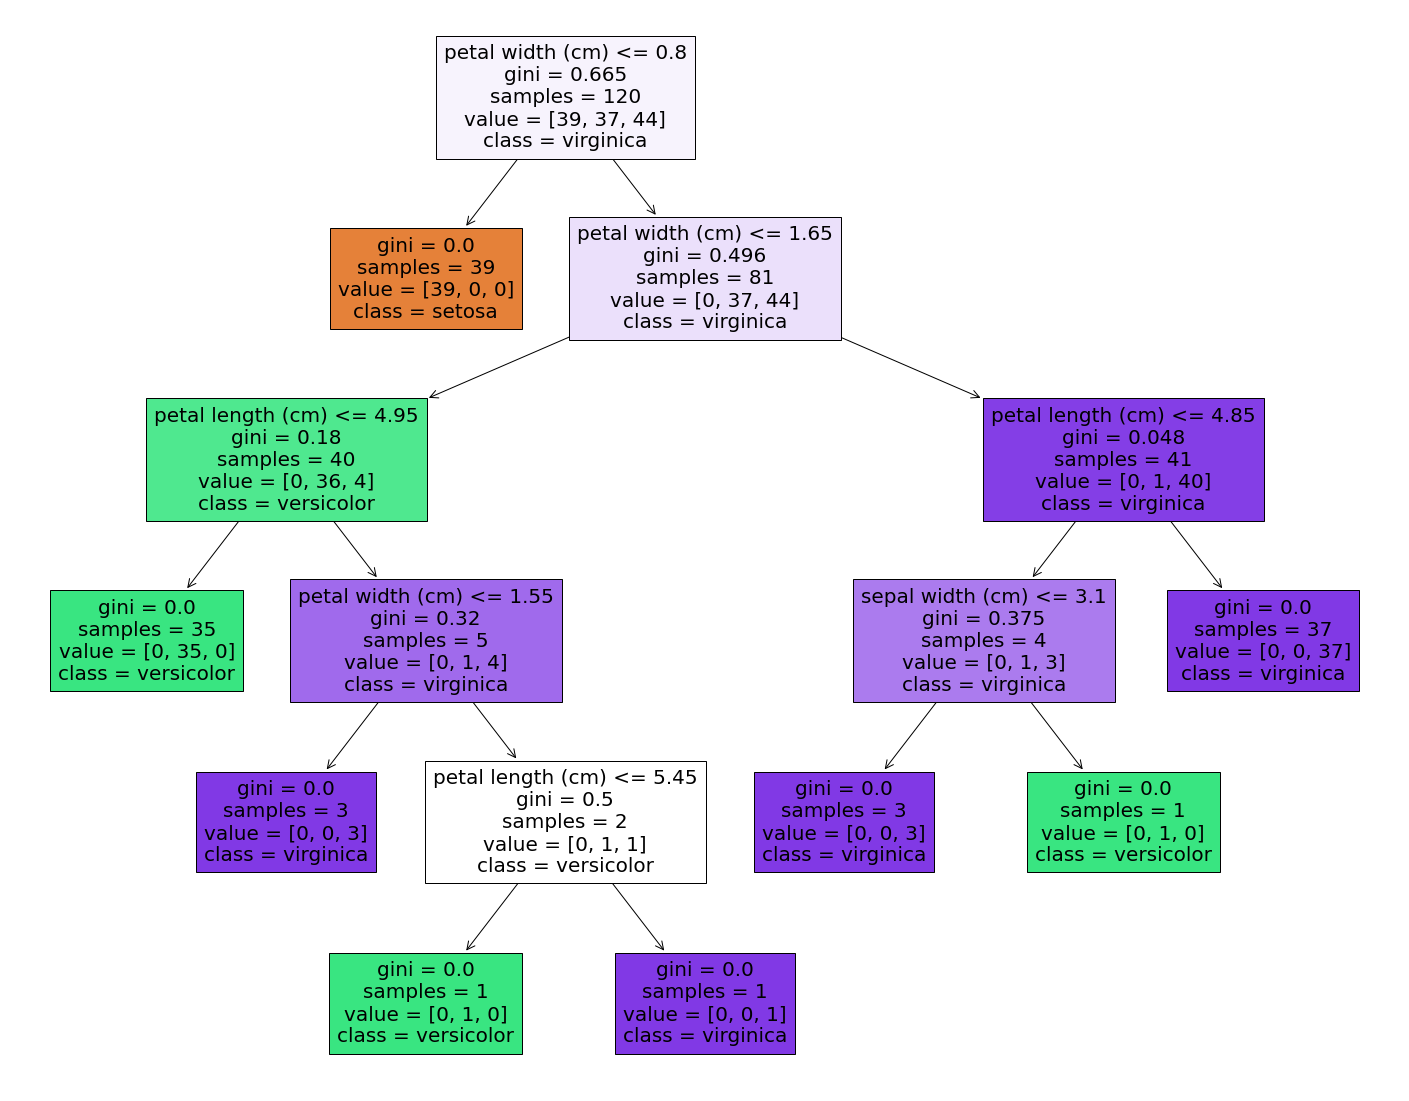

In [18]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)

# Altre opzioni

Addestriamo un altro modello, con opzioni diverse:

- criterion: funzione che misura la qualità dello split. I criteri supportati sono `gini` (valore di default), che calcola l'impurità dello split e `entropy`, che misura l'Information Gain.
- splitter: strategia da usare per dividere i dati in ogni nodo. Le strategie supportate sono `best` (valore di default) e `random`.

In [36]:
# criterion = 'gini' OR 'entropy'
# splitter = 'best' OR 'random'
model_splitter_random = DecisionTreeClassifier(criterion='entropy', splitter='random')
model_splitter_random = model_splitter_random.fit(X_train,y_train)
y_pred = model_splitter_random.predict(X_test)
print("Accuracy:", metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.9666666666666667


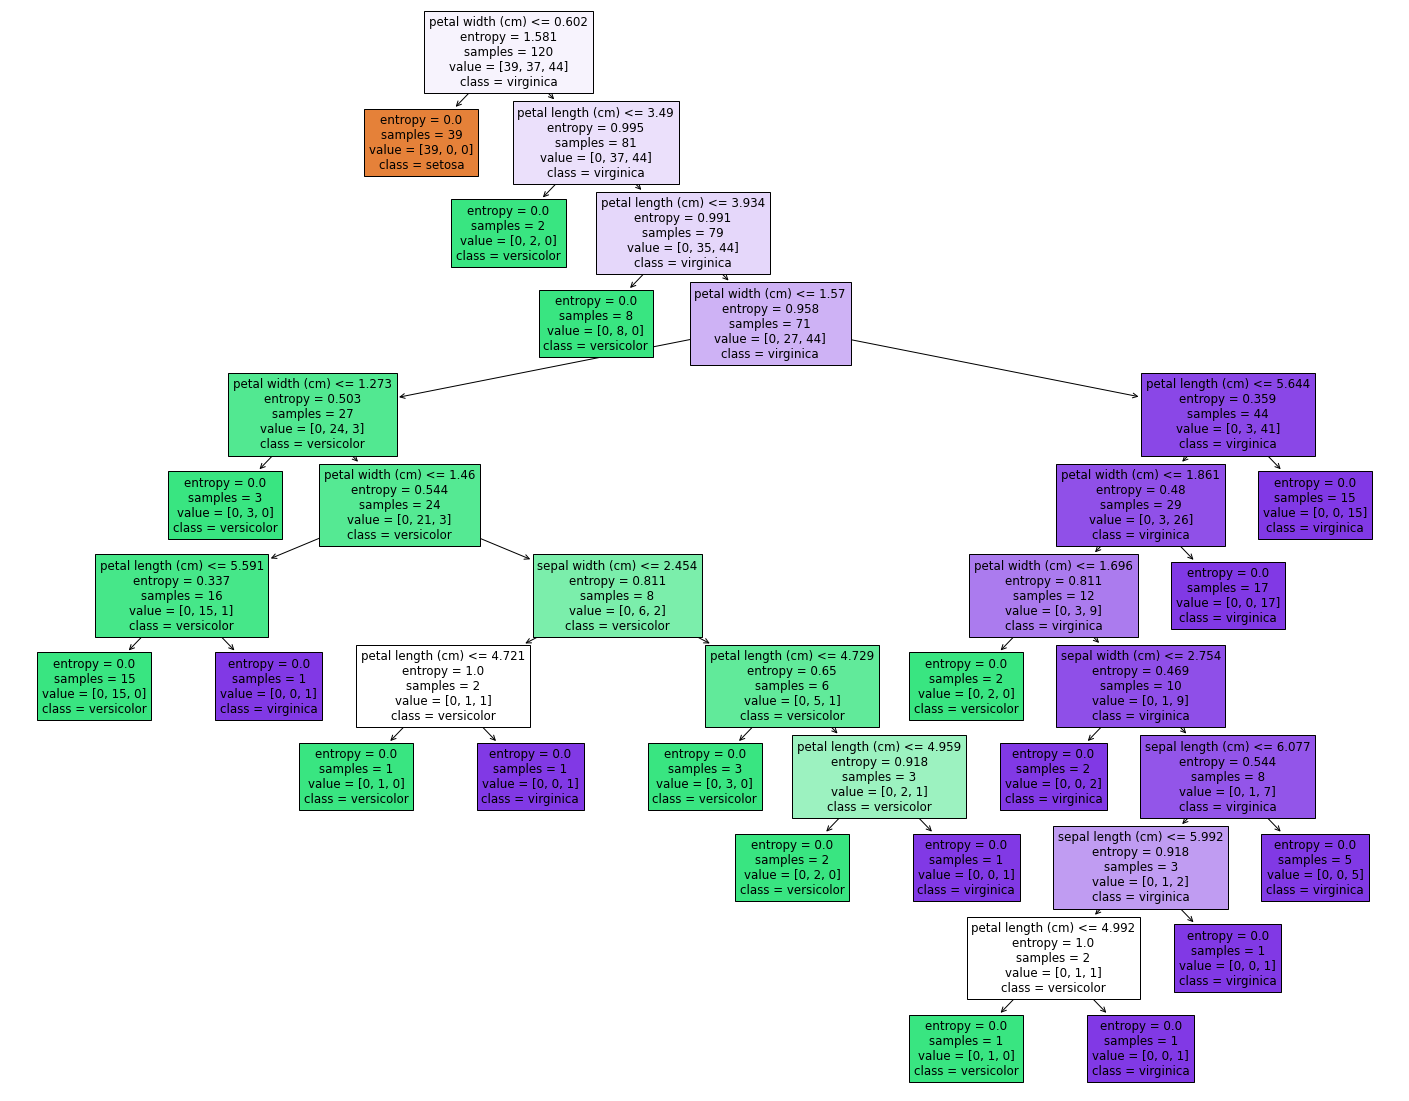

In [37]:
fig = plt.figure(figsize=(25,20))
_ = tree.plot_tree(model_splitter_random, 
                   feature_names=iris.feature_names,  
                   class_names=iris.target_names,
                   filled=True)